PDF generated: performance_report_with_buffer_0_.pdf
PDF generated: performance_report_with_buffer_1_.pdf
PDF generated: performance_report_with_buffer_2_.pdf
PDF generated: performance_report_with_buffer_3_.pdf
PDF generated: performance_report_with_buffer_4_.pdf
PDF generated: performance_report_with_buffer_5_.pdf
PDF generated: performance_report_with_buffer_6_.pdf
PDF generated: performance_report_with_buffer_7_.pdf
PDF generated: performance_report_with_buffer_8_.pdf
PDF generated: performance_report_with_buffer_9_.pdf
Took 3.892 seconds


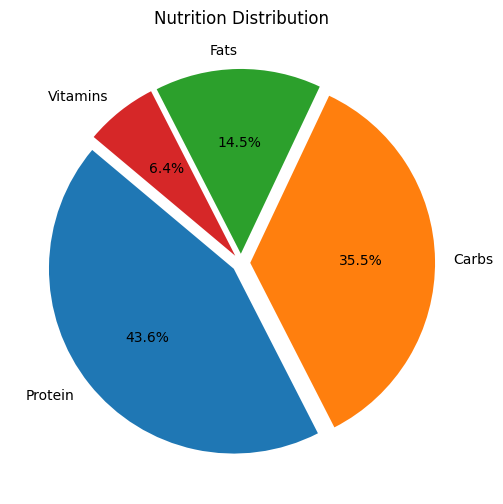

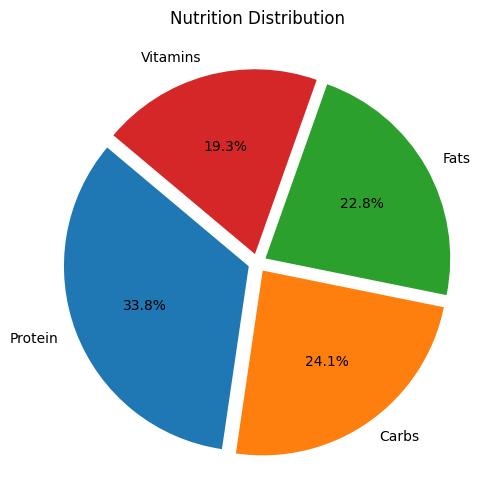

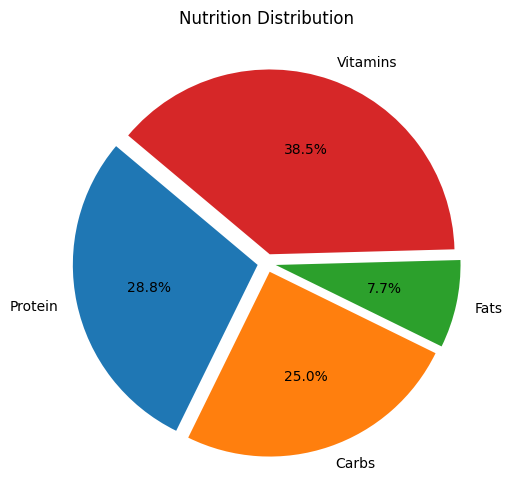

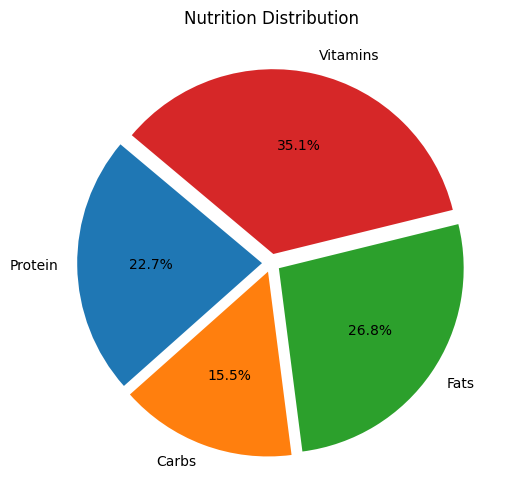

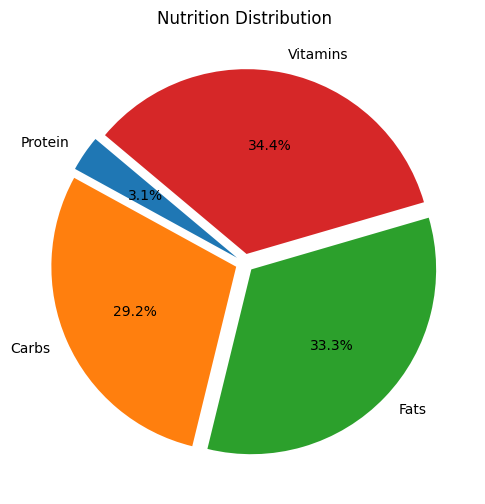

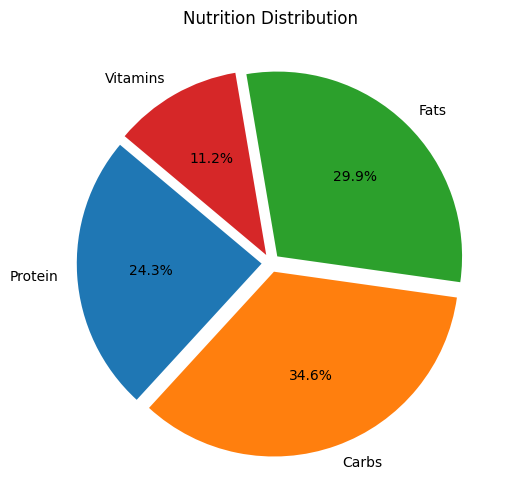

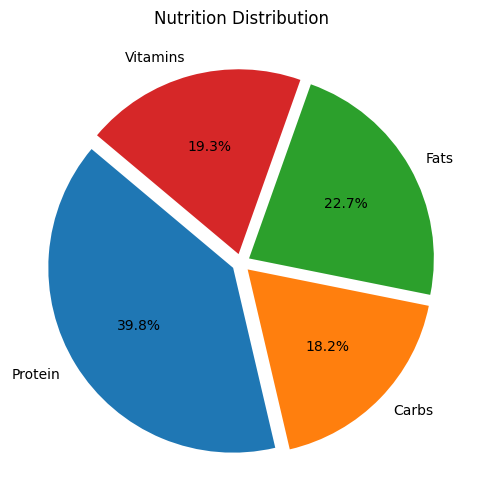

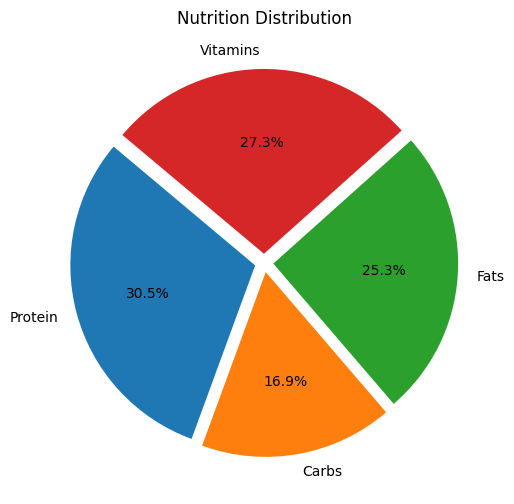

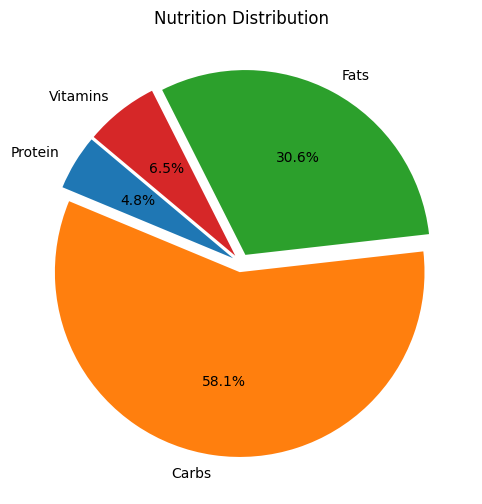

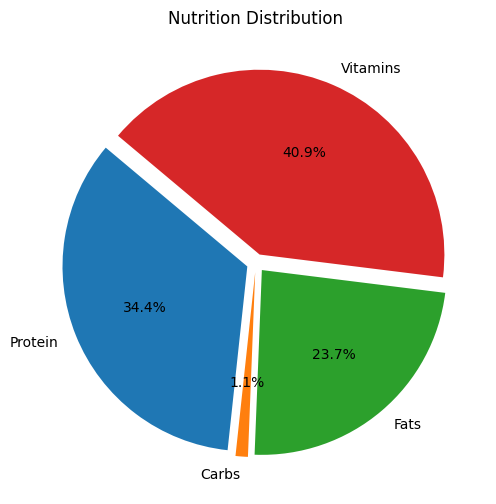

In [18]:
import matplotlib.pyplot as plt
from reportlab.platypus import SimpleDocTemplate, Image, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.units import inch
from datetime import date
from io import BytesIO
import time
import random

# Function to create matplotlib charts and return them as buffers
def create_matplotlib_charts():
    buffers = {}
    # Bar chart
    bar_chart_data = random.sample(range(1, 30), 6)
    bar_chart_labels = ['January', 'February', 'March', 'April', 'May', 'June']
    
    plt.figure(figsize=(8, 6))
    plt.bar(bar_chart_labels, bar_chart_data, color='blue')
    today = date.today()
    plt.title(f"Attendance Bar Chart ({today})")
    plt.xlabel('Month', fontweight='bold')
    plt.ylabel('Present', fontweight='bold')
    bar_chart_buffer = BytesIO()
    plt.savefig(bar_chart_buffer, format='png', bbox_inches='tight')
    bar_chart_buffer.seek(0)  # Rewind the buffer
    buffers['bar_chart'] = bar_chart_buffer
    plt.close()
    

    # Horizontal Bar chart
    plt.figure(figsize=(8, 6))
    plt.barh(bar_chart_labels, bar_chart_data, color='blue')
    plt.title(f"Attendance Horizontal Bar Chart ({today})")
    plt.xlabel('Present', fontweight='bold')
    plt.ylabel('Month', fontweight='bold')
    horizontal_chart_buffer = BytesIO()
    plt.savefig(horizontal_chart_buffer, format='png', bbox_inches='tight')
    horizontal_chart_buffer.seek(0)
    buffers['horizontal_chart'] = horizontal_chart_buffer
    plt.close()

    # Line graph
    rand_list=[]
    n=6
    for i in range(n):
        rand_list.append(random.randint(3,9))

    line_chart_data = rand_list
    line_chart_labels = ['Calories', 'Carbs', 'Protein', 'Fat', 'Vitamins', 'Minerals']
    plt.figure(figsize=(8, 6))
    plt.plot(line_chart_labels, line_chart_data, color='green', marker='o', linestyle='-', linewidth=2, markersize=6)
    plt.title('Line Graph', fontweight='bold')
    plt.xlabel('Categories', fontweight='bold')
    plt.ylabel('Values')
    line_chart_buffer = BytesIO()
    plt.savefig(line_chart_buffer, format='png', bbox_inches='tight')
    line_chart_buffer.seek(0)
    buffers['line_chart'] = line_chart_buffer
    plt.close()

    # Pie chart
    pie_chart_data = random.sample(range(1, 50), 6)
    pie_chart_labels = ['Calories', 'Carbs', 'Protein', 'Fat', 'Vitamins', 'Minerals']
    plt.figure(figsize=(6, 6))
    plt.pie(pie_chart_data, labels=pie_chart_labels, autopct='%1.1f%%', startangle=140)
    plt.title('Pie Chart', fontweight='bold')
    pie_chart_buffer = BytesIO()
    plt.savefig(pie_chart_buffer, format='png', bbox_inches='tight')
    pie_chart_buffer.seek(0)
    buffers['pie_chart'] = pie_chart_buffer
    plt.close()


    #Create a 3d pie chart
    d_pie_chart_data = random.sample(range(1, 50), 4)
    d_pie_chart_labels = ['Protein', 'Carbs', 'Fats', 'Vitamins']  # Nutrition categories
    
    # Create a 2D pie chart with a 3D-like appearance
    plt.figure(figsize=(8, 6))
    explode = [0.05] * len(d_pie_chart_data)  # Slightly separate the slices
    plt.pie(d_pie_chart_data, labels=d_pie_chart_labels, autopct='%1.1f%%', explode=explode, startangle=140, shadow=False)
    plt.title('Nutrition Distribution')
    plt.figure(figsize=(8, 6))
   
    wedges, texts, autotexts = plt.pie(d_pie_chart_data, labels=d_pie_chart_labels, autopct='%1.1f%%', explode=explode, startangle=140, shadow=True)

    for wedge in wedges:
        wedge.set_edgecolor('black')  # Add 3D-like depth effect
    
    # Save the pie chart
    d_pie_chart_buffer = BytesIO()
    plt.savefig(d_pie_chart_buffer, format='png', bbox_inches='tight')
    buffers['d_pie_chart'] = d_pie_chart_buffer
    plt.close()

    return buffers

# Function to create a PDF using ReportLab with embedded buffered images
def create_pdf_with_charts(pdf_filename, buffers):
    doc = SimpleDocTemplate(pdf_filename, pagesize=(8.27 * inch, 11.69 * inch))  # Set page size to A4
    styles = getSampleStyleSheet()

    elements = []
    # Add some text for the bar chart
    elements.append(Paragraph('Player Report:', styles['Normal']))
    elements.append(Paragraph('Genetated using matploblib and reportlab libraries:', styles['Normal']))
    elements.append(Spacer(1, 24))

    # Add the bar chart image from buffer
    bar_chart_image = Image(buffers['bar_chart'], 7 * inch, 4 * inch)
    elements.append(bar_chart_image)
    
    elements.append(Spacer(1, 12))

    # Add the horizontal bar chart image from buffer
    elements.append(Paragraph('This is a horizontal bar chart created using matplotlib and embedded in a PDF:', styles['Normal']))
    elements.append(Spacer(1, 24))
    horizontal_chart_image = Image(buffers['horizontal_chart'], 7 * inch, 4 * inch)
    elements.append(horizontal_chart_image)
    
    elements.append(Spacer(1, 12))

    # Add the line graph image from buffer
    elements.append(Paragraph('This is a line graph created using matplotlib and embedded in a PDF:', styles['Normal']))
    elements.append(Spacer(1, 24))
    line_chart_image = Image(buffers['line_chart'], 7 * inch, 4 * inch)
    elements.append(line_chart_image)
    
    elements.append(Spacer(1, 12))

    # Add the pie chart image from buffer
    elements.append(Paragraph('This is a pie chart created using matplotlib and embedded in a PDF:', styles['Normal']))
    elements.append(Spacer(1, 24))
    pie_chart_image = Image(buffers['pie_chart'], 4 * inch, 4 * inch)
    elements.append(pie_chart_image)

    # Add the pie chart image from buffer
    elements.append(Paragraph('This is a 3d pie chart created using matplotlib and embedded in a PDF:', styles['Normal']))
    elements.append(Spacer(1, 24))
    d_pie_chart_image = Image(buffers['d_pie_chart'], 4 * inch, 4 * inch)
    elements.append(d_pie_chart_image)

    # Build the PDF
    doc.build(elements)

# Create the matplotlib charts and get the buffers
time_start = time.perf_counter()
for i in range(10):
    buffers = create_matplotlib_charts()
    # Create the PDF with the embedded charts using the buffers
    pdf_filename = "performance_report_with_buffer_" + str(i) + "_.pdf"
    create_pdf_with_charts(pdf_filename, buffers)
    print(f"PDF generated: {pdf_filename}")
    time_end = time.perf_counter()
    time_duration = time_end - time_start

# report the duration
print(f'Took {time_duration:.3f} seconds')